In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from numpy import zeros, newaxis
from numpy import array
from numpy import reshape
import numpy as np
import csv
import matplotlib.pyplot as plt
import re


#import dataset

# legitime : http://www.impact-im.com/threads/liste-de-500000-e-mail-fran%C3%A7ais.740/
# spam : https://github.com/tsirolnik/spam-domains-list/blob/master/spamdomains.txt

vocab_size = 50000


with open('./dataset/fusion/train_data.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        train_data_tab = []
        for line in reader:
                train_data_tab.extend(line)

for i in range (len(train_data_tab)):
    if re.search(r'@.+', train_data_tab[i]):
        train_data_tab[i] = re.sub(r'@.+', '@laposte.fr', train_data_tab[i])
    elif re.search(r'\.\w{3,4}($|\?)', train_data_tab[i]):
        train_data_tab[i] = re.sub(r'\.\w{3,4}($|\?)', '@laposte.fr', train_data_tab[i])
    else:
        train_data_tab[i] += '@laposte.fr'


x_train = []
for i in train_data_tab:
    x_train.append(i)
#x_train = x_train[:5000]



##################################################################


with open('./dataset/fusion/train_labels.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        train_labels = []
        for line in reader:
                train_labels.extend(line)
                
train_labels = list(map(int, train_labels))
#train_labels = train_labels[:5000]



##################################################################


with open('./dataset/fusion/test_data.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        test_data_tab = []
        for line in reader:
                test_data_tab.extend(line)

for i in range (len(test_data_tab)):
    if re.search(r'@.+', test_data_tab[i]):
        test_data_tab[i] = re.sub(r'@.+', '@laposte.fr', test_data_tab[i])
    elif re.search(r'\.\w{3,4}($|\?)', test_data_tab[i]):
        test_data_tab[i] = re.sub(r'\.\w{3,4}($|\?)', '@laposte.fr', test_data_tab[i])
    else:
        test_data_tab[i] += '@laposte.fr'
        


x_test = []
for i in test_data_tab:
    x_test.append(i)
#x_test = x_test[:5000]

##################################################################



with open('./dataset/fusion/test_labels.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        test_labels = []
        for line in reader:
                test_labels.extend(line)

test_labels = list(map(int, test_labels))
#test_labels = test_labels[:5000]








Using TensorFlow backend.


In [2]:
from keras.preprocessing.text import Tokenizer

max_words = 1000
num_classes = max(train_labels) + 1


t = Tokenizer(num_words = max_words)

t.fit_on_texts(x_train)
x_train = t.texts_to_matrix(x_train, mode='count')
x_test = t.texts_to_matrix(x_test, mode='count')

y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

In [5]:
print('shape x_train : {}'.format(x_train.shape))
print('shape x_test : {}'.format(x_test.shape))
print('shape y_train : {}'.format(y_train.shape))
print('shape y_test : {}'.format(y_test.shape))
print(train_data_tab[5])
print(y_train[5])

shape x_train : (50000, 1000)
shape x_test : (50000, 1000)
shape y_train : (50000, 2)
shape y_test : (50000, 2)
svam-systems@laposte.fr
[0. 1.]


In [18]:
#build le model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation





model = Sequential()
#model.add(keras.layers.Embedding(50000,1))
#model.add(keras.layers.GlobalAveragePooling1D())
#model.add(keras.layers.Dense(512, activation=tf.nn.sigmoid))
#model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#model.summary()


model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])




history = model.fit(x_train,
                    y_train,
                    epochs=2,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)






Train on 50000 samples, validate on 50000 samples
Epoch 1/2
50000/50000 [==============================] - 7s 142us/step - loss: 0.5669 - acc: 0.6192 - val_loss: 0.5356 - val_acc: 0.6329
Epoch 2/2
50000/50000 [==============================] - 7s 137us/step - loss: 0.5298 - acc: 0.6318 - val_loss: 0.5333 - val_acc: 0.6331


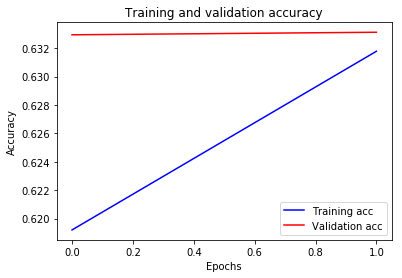

In [19]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']


plt.plot(acc_values, 'b', label='Training acc')
plt.plot( val_acc_values, 'b',color='red', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:

##################################
##                              ##
##            evaluate          ##
##                              ##
##################################
# Evaluate the model

#results = model.evaluate(test_data, test_labels)
#print(results)



evaluate_data = ['class.hammerwin@laposte.fr']
evaluate_data = t.texts_to_matrix(evaluate_data, mode='count')
predicted_classes = model.predict_classes(evaluate_data)
print(predicted_classes)

[1]
